In [1]:
!pip3 install torch torchvision torchaudio

  Using cached torch-1.12.1-cp39-cp39-win_amd64.whl (161.8 MB)
  Using cached torchvision-0.13.1-cp39-cp39-win_amd64.whl (1.1 MB)
  Using cached torchaudio-0.12.1-cp39-cp39-win_amd64.whl (969 kB)
  Using cached requests-2.28.1-py3-none-any.whl (62 kB)
  Using cached urllib3-1.26.12-py2.py3-none-any.whl (140 kB)
  Using cached charset_normalizer-2.1.1-py3-none-any.whl (39 kB)
  Using cached idna-3.3-py3-none-any.whl (61 kB)


### Importando módulos

In [3]:
import torch
import random
import numpy as np
import matplotlib.pyplot as plt
from torch import nn
from sklearn.datasets import make_classification, make_moons

In [57]:
plt.rcParams["figure.figsize"] = (10, 5)
np.random.seed(42)

### Tensores

As entradas, saídas e transformações de uma rede neural são representadas através de tensores.
Tensores são estrutura de dados capazes de lidar com a alta dimensionalidade dos problemas de aprendizado de máquina.
Essa estrutura de dados é uma generalização de outras estruturas de dados, como escalares, vetores e matrizes.

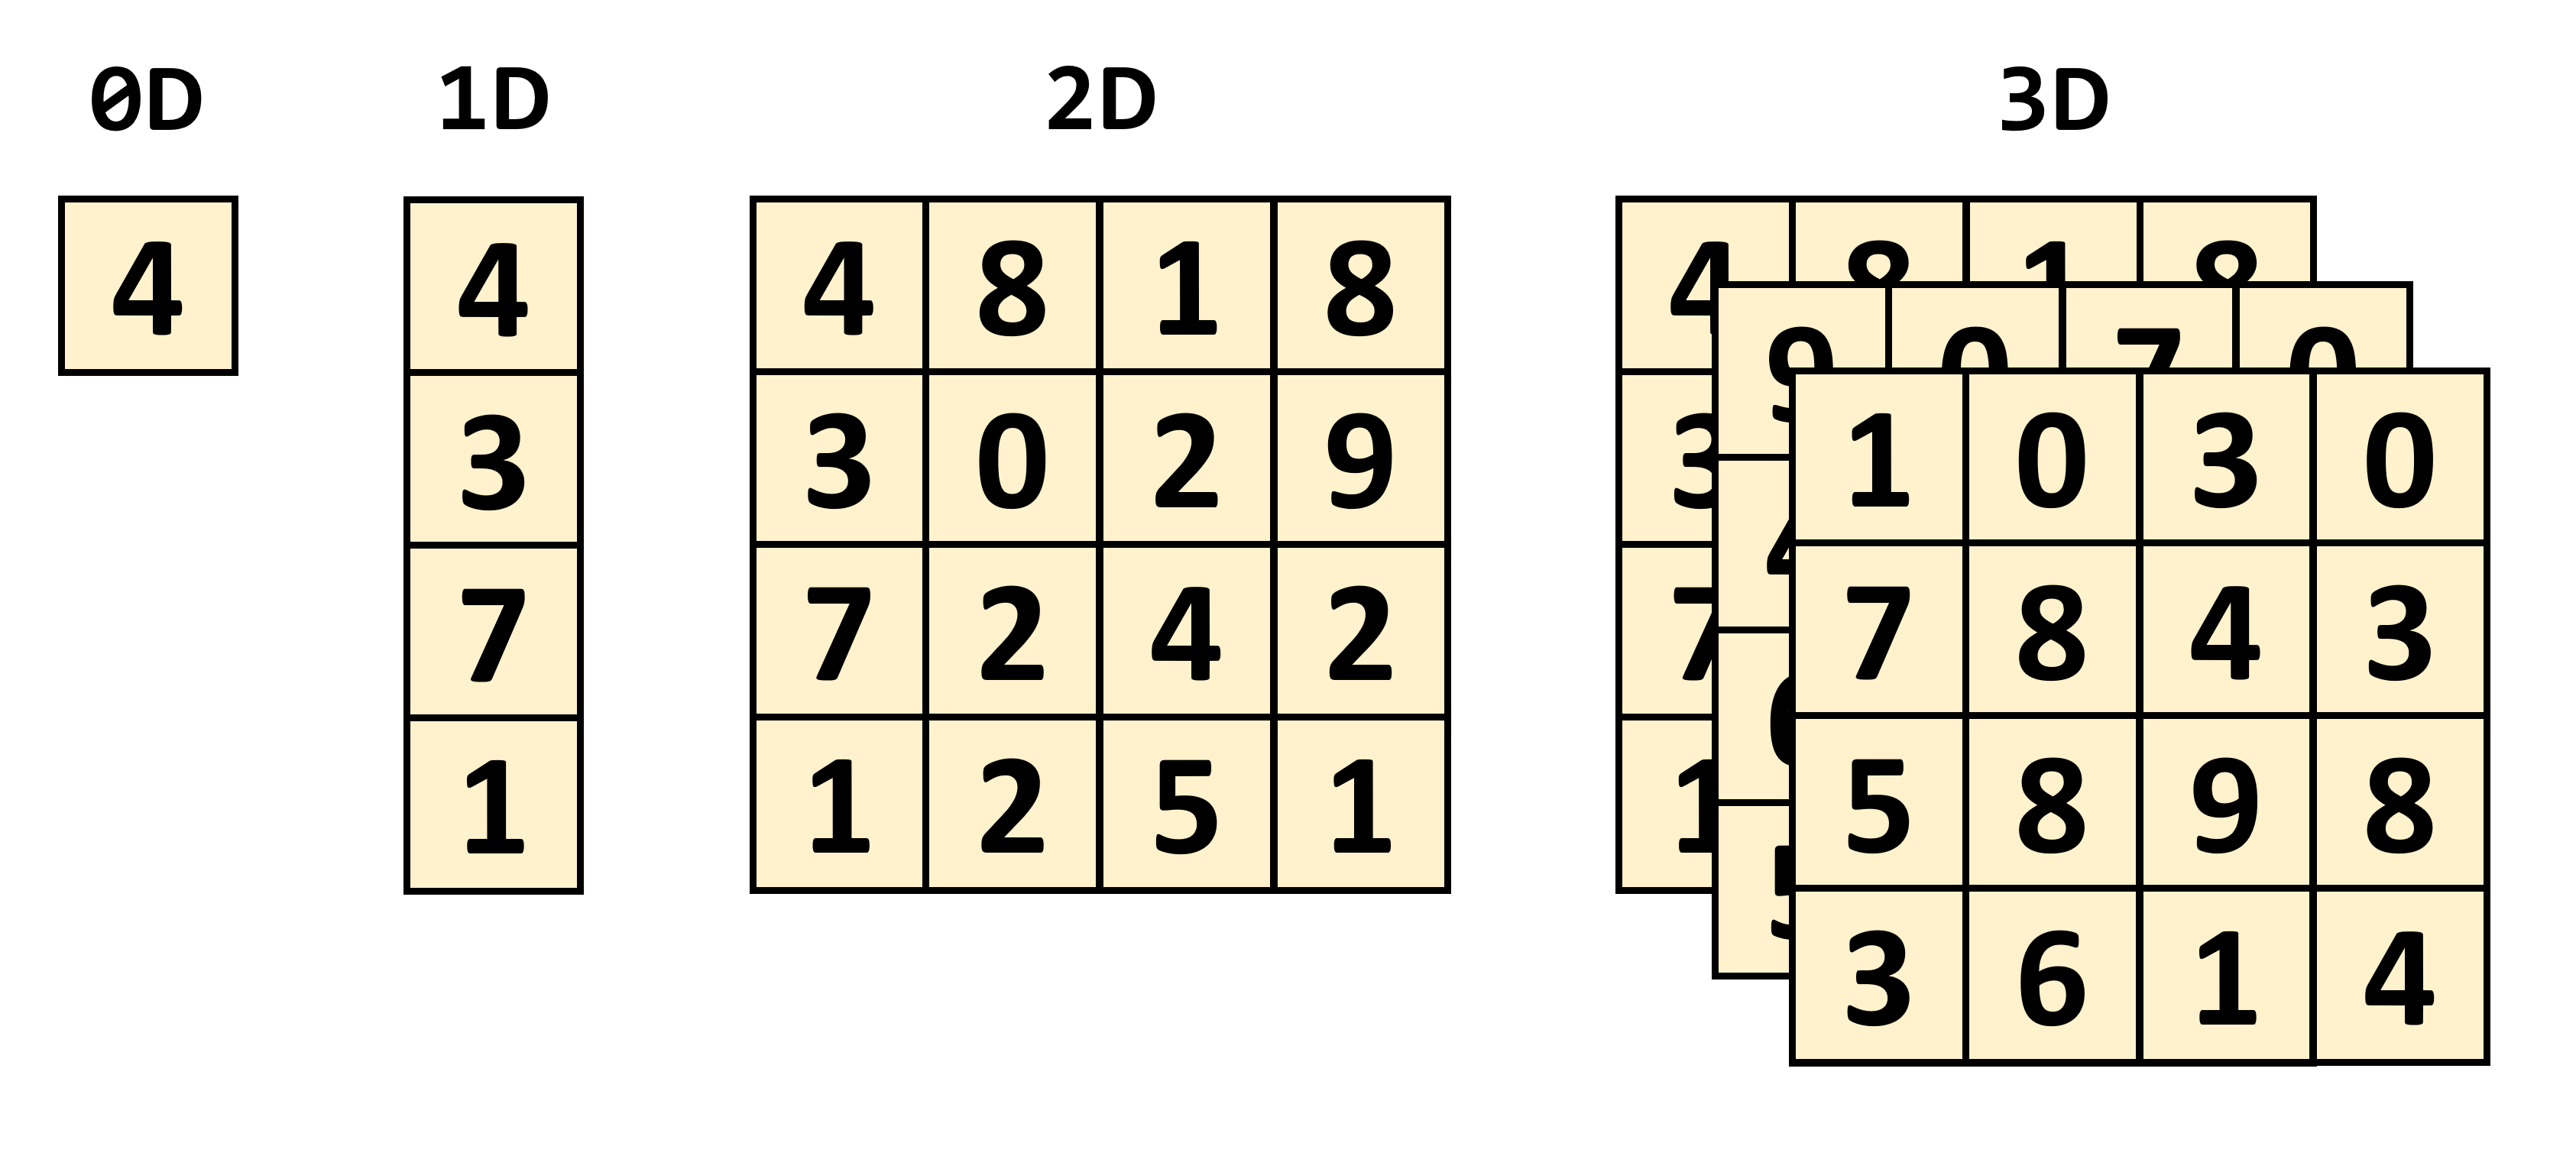

### Classificação utilizando modelos lineares (RETAS)

* Retas podem ser interpretadas como um modelo de classificação linear.
* Os coefientes da reta representam os parâmetros do modelo.
* Para problemas de classificação, dado um conjunto de entradas Xi, o valor de Y define se o ponto está acima ou abaixo da reta, separando linearmente o problema em duas classes.
* Dessa forma é possível mapear uma entrada Xi = {x1, x2, x3 ... Xn} para uma saída Y = f(X).

In [24]:
def plot_linear_model(a, b, X):
    Y_model = a * X + b
    plt.axvline(0, Y_model.min(), Y_model.max(), color="k", linewidth=1)
    plt.axhline(0, X.min(), X.max(), color="k", linewidth=1)
    plt.plot(X, Y_model,  color="r", linewidth=1)
    plt.grid(True)
    return Y_model

In [34]:
# Gerando um conjunto de pontos para classificação
X, Y = make_classification(n_samples=50, n_features=2, n_redundant=0, n_clusters_per_class=1)

In [35]:
# Definindo os parâmetros do modelo linear
A, B = random.randrange(-2, 2), random.randrange(-4, 4)

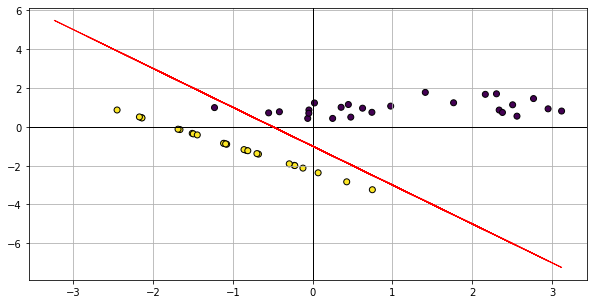

In [61]:
# Plotando o modelo linear e o conjunto de pontos
Y_model = plot_linear_model(A, B, X)
plt.scatter(X[:, 0], X[:, 1], marker="o", c=Y, edgecolor="k")

In [58]:
def linear_model_predict(p, w1, b):
    if(w1 * p[0] + w1 * p[1] + b) >= 0:
        return 1, "yellow"
    else:
        return 0, "purple"

In [59]:
# Selecionando um ponto aleatório no conjunto de dados
idx = random.randint(0, len(X))
p = (X[idx][0], X[idx][1])
prediction, color = linear_model_predict(p, A, B)
print(f"Classe Real: {Y[idx]} / Classe Prevista: {prediction}")

Classe Real: 1 / Classe Prevista: 1


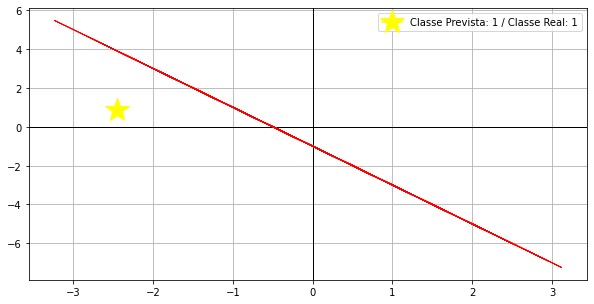

In [60]:
# Realizando previsões com o modelo linear
prediction, color = linear_model_predict(p, A, B)
plot_linear_model(A, B, X)
label = f"Classe Prevista: {prediction} / Classe Real: {Y[idx]}"
plt.plot(p[0], p[1], marker="*", color=color, markersize=25, label=label)
plt.legend()

In [56]:
# Calculando a acurácia do modelo
count = 0
for index in range(0, len(X)):
    prediction, _ = linear_model_predict(p, A, B)
    if prediction == Y[index]:
        count += 1

print(f"Acurácia: {round((100*count/len(X)), 2)} %")

Acurácia: 50.0 %


### Classificação utilizando modelos lineares (PERCEPTRON)

* Os perceptrons são modelos computacionais de um neurônio.
* Eles representam os componentes fundamentais das redes neurais.
* Utilizando apenas um perceptron, podemos criar um modelo linear similar a uma reta.
* Os coefientes da reta representam os pesos e viéses do modelo.

In [62]:
def perceptron_model_predict(activation):
    if activation <= 0:
        return 0, "purple"
    else:
        return 1, "yellow"

In [63]:
# Inicializando um perceptron com os parâmetros da reta
perceptron = nn.Linear(2, 1)
sigmoid_activation = nn.Sigmoid()
perceptron.weight = nn.Parameter(torch.Tensor([[A, A]]))
perceptron.bias = nn.Parameter(torch.Tensor([B]))

print(f"Configuração do Perceptron: {perceptron}")
print(f"Pesos: {perceptron.weight.data}")
print(f"Viés: {perceptron.bias.data}")

Configuração do Perceptron: Linear(in_features=2, out_features=1, bias=True)
Pesos: tensor([[-2., -2.]])
Viés: tensor([-1.])


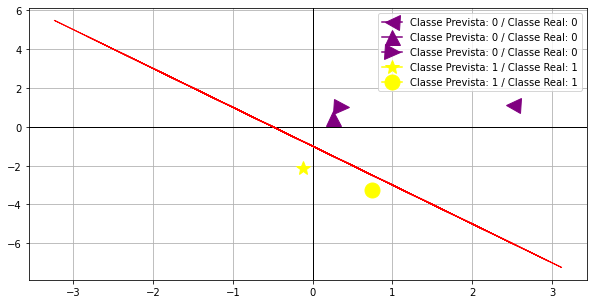

In [68]:
# Realizando previsões com o modelo linear
markers = ["<", "^", ">", "*", "o"]
plot_linear_model(A, B, X)
for i in range(0, 5):
    idx = random.randint(0, len(X))
    aux = perceptron(torch.Tensor(X[idx]))
    prediction, color = perceptron_model_predict(aux)
    label = f"Classe Prevista: {prediction} / Classe Real: {Y[idx]}"
    plt.plot(X[idx][0], X[idx][1], marker=markers[i], color=color, markersize=15, label=label)
    plt.legend()

### Lidando com não linearidades

* No entanto, os modelos lineares não são capazes de lidar com distribuições não-lineares
* Como 

In [69]:
X_nl, Y_nl = make_moons(n_samples=250, noise=0.2)

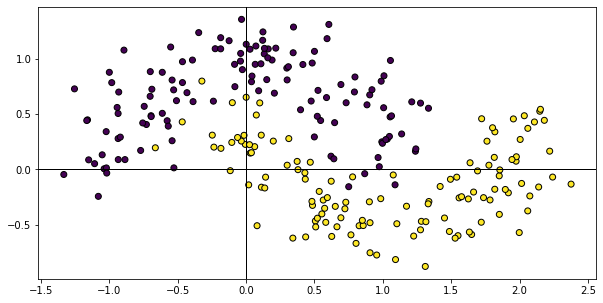

In [71]:
plt.axvline(0, Y_nl.min(), Y_nl.max(), color="k", linewidth=1)
plt.axhline(0, X_nl.min(), X_nl.max(), color="k", linewidth=1)
plt.scatter(X_nl[:, 0], X_nl[:, 1], marker="o", c=Y_nl, edgecolor="k")